We will consider the infinite series for $\sin x$

$$\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots.$$

Or when we express it in finite sum,

$$\sin x \approx \sum_{n=1}^N \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}.$$

We will sum it until the $\left|\frac{n\text{th term}}{\text{sum}}\right| < 10^{-8}$


In [40]:
# Create a function that will do this
import numpy as np
import pandas as pd
from math import factorial, pi, sin

def man_factorial(n):
    fact = 1
    for num in range(2,n+1):
        fact *= num
    return fact

def man_sin(x, eps = 1e-8, man_fact = False):
    n = 1
    term = x
    sum = x
    while abs(term/sum)>eps:
        n += 1
        if not man_fact:
            term = (((-1)**(n-1))*(x**(2*n-1)))/(factorial(2*n-1))
        else:
            term = (((-1)**(n-1))*(x**(2*n-1)))/(man_factorial(2*n-1))
        sum += term

    #print ("x = ", x,", n_max = ", n, ", sum = ", sum, ", |(sum-sin(x))/sin(x)| = ", abs((sum - sin(x))/sin(x)))
    return x, n, sum, abs((sum - sin(x))/sin(x))

In [93]:
df = pd.DataFrame(columns=['x', '$n_max$', 'sum', '$|(sum-sin(x))/sin(x)|$'])

xs = np.linspace(0,10, 1000)*pi
pd.set_option('display.max_rows', 20)

for x in xs:
    df.loc[len(df)] = man_sin(x, eps = 1e-8)

#df



C:\Users\cahya\AppData\Local\Temp\ipykernel_6384\3390146071.py:16: RuntimeWarning: invalid value encountered in scalar divide
  while abs(term/sum)>eps:
C:\Users\cahya\AppData\Local\Temp\ipykernel_6384\3390146071.py:25: RuntimeWarning: invalid value encountered in scalar divide
  return x, n, sum, abs((sum - sin(x))/sin(x))


<Axes: xlabel='x'>

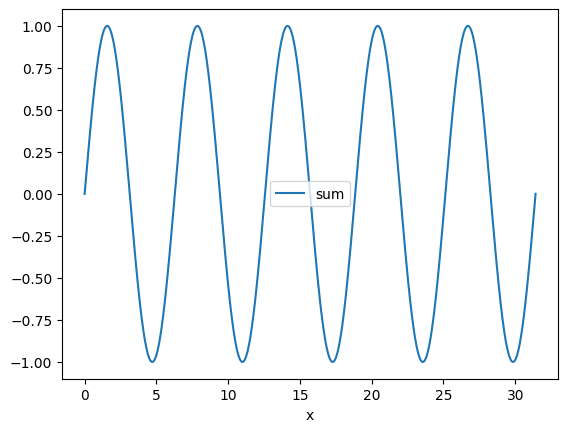

In [94]:
df.plot('x', 'sum')